<a href="https://colab.research.google.com/github/Norberto27/Norberto27/blob/main/IAPH_Desaf%C3%ADo_Final_Procesamiento_del_Habla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DESAFIO FINAL PROCESAMIENTO DEL HABLA**

###**TEMA: TEMA 8 Identificación de Personajes y Relaciones del libro Martin Fierro**

###**Autor: Norberto Raul Martearena Urquiza**

###**Legajo:  11099**

#**Objetivo del desarrollo**

Se trata de desarrolar un analisis del Martin Fierro para identificar:

Personajes, Entidades, Relaciones y Visualizacion Grafica

#**Vamos a incluir las librerias necesarias para el proyecto**

# Instalación de las librerías necesarias



In [ ]:
!pip install spacy
!pip install networkx
!pip install matplotlib
!python -m spacy download es_core_news_sm
!pip install --upgrade spacy torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 23.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#**Introducción**

El poema "Martín Fierro" es un pilar de la literatura gauchesca argentina que narra las vivencias de un gaucho en un contexto de injusticia y marginación. Este análisis se propone identificar los personajes principales mediante un sistema de reconocimiento de entidades (NER) y explorar sus relaciones a través de gráficos de redes.

En este proyecto, implementaremos un sistema de reconocimiento de entidades para identificar personajes en el poema *Martín Fierro* y analizaremos las relaciones entre ellos usando gráficos de redes. Esto nos permitirá explorar cómo interactúan los personajes a lo largo de la obra.






#**Justificación del Modelo Empleado**

El modelo utilizado para analizar el texto del Martín Fierro combina técnicas de procesamiento de lenguaje natural (NLP) y análisis de redes. Este enfoque es adecuado porque:

**Identificación de Entidades Relevantes:**

Al utilizar un modelo de reconocimiento de entidades, se pueden detectar términos importantes que reflejan los personajes, conceptos y elementos del texto literario. Esto permite centrarnos en aspectos clave de la narrativa.
Relaciones Entre Entidades:

Analizar las coocurrencias de entidades en las estrofas nos ayuda a entender cómo se conectan y qué vínculos son más relevantes en el poema. Esto tiene un valor significativo en literatura, ya que las relaciones narrativas pueden revelar temas subyacentes y dinámicas de los personajes.
Visualización Gráfica:

La creación de un grafo permite interpretar de manera intuitiva y visual las relaciones detectadas. Esto es especialmente útil para identificar patrones y entender el contexto global del poema.
Flexibilidad y Escalabilidad:

Este modelo puede ampliarse fácilmente para analizar otros textos literarios, añadiendo o ajustando las entidades según el caso. Así, es versátil para cumplir con distintos objetivos de análisis

#**Comentarios Adicionales sobre el Trabajo Realizado**

##**Sobre las Relaciones:**


El análisis muestra cómo Martín Fierro interactúa simbólicamente con entidades como Los Santos, El Pueblo y La China. Estas relaciones reflejan temas de vulnerabilidad, exclusión social y añoranza, que son pilares en la obra.
La frecuencia de las relaciones y las coocurrencias en estrofas específicas pueden interpretarse como momentos narrativos claves donde estos elementos cobran protagonismo.

##**Impacto del Trabajo:**

Este enfoque no solo permite identificar patrones literarios, sino que también abre la puerta a análisis críticos de la obra, como la representación de roles sociales, el conflicto y la identidad gaucha.

#**Preprocesamiento del Dataset**

En este bloque vamos a realizar la carga y limpieza del texto

# Introducción

"""
El poema "Martín Fierro" es un pilar de la literatura gauchesca argentina que narra las vivencias de un gaucho en un contexto de injusticia y marginación. Este análisis se propone identificar los personajes principales mediante un sistema de reconocimiento de entidades (NER) y explorar sus relaciones a través de gráficos de redes.
"""


In [ ]:
# Importamos librerías necesarias para el procesamiento de texto y redes
import requests

# Descargar el texto del poema
url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"
response = requests.get(url)

# Guardamos el archivo PDF localmente
with open("martin_fierro.pdf", "wb") as f:
    f.write(response.content)

# Para extraer el texto, puedes usar alguna librería como PyPDF2 o pdfplumber (opcional)


In [ ]:
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

# Revisar los archivos cargados
for filename in uploaded.keys():
    print(f"Archivo subido: {filename}")


Saving El Gaucho Martín Fierro.docx to El Gaucho Martín Fierro (2).docx
Archivo subido: El Gaucho Martín Fierro (2).docx


preparo para leer el archivo de word

In [ ]:
!pip install python-docx


Subo el arechivo a colab

In [ ]:
from google.colab import files

# Subir archivo desde tu computadora
uploaded = files.upload()

# Nombre del archivo subido
filename = list(uploaded.keys())[0]
print(f"Archivo subido: {filename}")


Saving El Gaucho Martín Fierro.docx to El Gaucho Martín Fierro (3).docx
Archivo subido: El Gaucho Martín Fierro (3).docx


Leer el contenido del archivo Word

In [ ]:
from docx import Document

# Abrir el archivo Word
doc = Document(filename)  # Si está en Drive, usa `ruta_archivo`

# Leer el contenido del archivo
texto = ""
for parrafo in doc.paragraphs:
    texto += parrafo.text + "\n"

# Mostrar los primeros 500 caracteres del texto
print(texto[:500])


El Gaucho Martín Fierro
I
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Yo he 


Vamos a limpiar el dataset

eliminaremos entre otras cosas

Página
4
II
III
texto en cursiva

In [ ]:
import re

# Cargar el texto desde el archivo docx
#from docx import Document

# Ruta al archivo
#ruta_archivo = "martin_fierro.docx"

# Cargar el contenido del archivo
#doc = Document(ruta_archivo)
#texto = "\n".join([p.text for p in doc.paragraphs])

# Dividir el texto en líneas y omitir la primera línea (el título del poema)
lineas = texto.splitlines()
#Lineas = texto
lineas_sin_titulo = lineas[1:]  # Excluir la primera línea

# Definir un patrón para líneas que comienzan con "Página", números romanos o números del 1 al 55
patron = r"^(\d{1,2} .*|\d{1,2}$|Página.*|[IVX]+$)"

# Filtrar las líneas que no coincidan con el patrón
lineas_limpias = [linea for linea in lineas_sin_titulo if not re.match(patron, linea.strip())]

# Unir las líneas limpias en un nuevo texto
texto_limpio = "\n".join(lineas_limpias)

# Guardar el texto limpio en un archivo nuevo
nuevo_archivo = "martin_fierro_limpio.txt"
with open(nuevo_archivo, "w", encoding="utf-8") as f:
    f.write(texto_limpio)

print(f"Texto limpio guardado en: {nuevo_archivo}")


Texto limpio guardado en: martin_fierro_limpio.txt


In [ ]:
print(texto_limpio)

Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.
Yo he visto muchos cantores,
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar:
parece que sin largar
se cansaron en partidas.
Mas ande otro criollo pasa
Martín Fierro ha de pasar;
nada lo hace recular,
ni las fantasmas lo espantan,
y dende que todos cantan
yo también quiero cantar.
Cantando me he de morir,
cantando me han de enterrar,
y cantando he de llegar
al pie del Eterno Padre;
dende el vientre de mi madre
vine a este mundo a cantar.
Que no se trabe mi lengua
ni me falte la palabra;
el cantar m

Guardar el contenido en un archivo de texto:

In [ ]:
with open("contenido_extraido.txt", "w", encoding="utf-8") as f:
    f.write(texto)
print("El contenido ha sido guardado en 'contenido_extraido.txt'.")


El contenido ha sido guardado en 'contenido_extraido.txt'.


Dividir el texto en párrafos:

In [ ]:
# Leer el archivo completo en líneas
#with open("martin_fierro_final.txt", "r", encoding="utf-8") as archivo:
#    lineas = archivo.readlines()

# Agrupar cada 6 líneas en un párrafo
#parrafos = ["".join(lineas[i:i+6]).strip() for i in range(0, len(lineas), 6)]
#parrafos = ["".join(texto_limpio[i:i+6]).strip() for i in range(0, len(texto_limpio), 6)]
# Mostrar cantidad de párrafos y un ejemplo


# Dividir en estrofas
#def obtener_estrofas(texto):
lineas=[linea.strip() for linea in texto_limpio.split("\n") if linea.strip()]
estrofas=[]
i=0
total_lineas=len(lineas)
# Puse una condicion para la cantidad de Versos, todas las estrofas tienen 6 versos menos la ultima
while i < total_lineas:
    # La ultima estrofa tiene 8 versos por eso puse una condicion en ella
    if total_lineas - i == 8:
        estrofa="\n".join(lineas[i:i + 8])
        estrofas.append(estrofa)
        i += 8
    # Estas serian todas las demas estrofas, 6 versos cada una
    else:
        estrofa="\n".join(lineas[i:i + 6])
        estrofas.append(estrofa)
        i += 6
#    return estrofas
print(f"Cantidad de estrofas: {len(estrofas)}")
print(f"Ejemplo de estrofas:\n {estrofas[0]}")

# Guardar los párrafos en un nuevo archivo si es necesario
with open("martin_fierro_estrofas.txt", "w", encoding="utf-8") as archivo:
    archivo.write("\n\n".join(estrofas))



Cantidad de estrofas: 387
Ejemplo de estrofas:
 Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.


In [ ]:
for i, estrofa in enumerate(estrofas[:3], start=1):  # Mostrará las 3 primeras
    print(f"Estrofa {i}:\n{estrofa}\n")


Estrofa 1:
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.

Estrofa 2:
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.

Estrofa 3:
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.



5. Criterio del Uso del Dataset


In [ ]:
# Suponemos que ya tenemos el texto del poema procesado y disponible en un archivo de texto (martin_fierro.txt)
#with open("El Gaucho Martín Fierro.docx", "r", encoding="utf-8") as f:
#    texto = f.read()

# Dividir el texto en estrofas (suponiendo que están separadas por dos saltos de línea)
# estrofas = texto.split("\n\n")
num_est = len(estrofas)

# Separamos el dataset en un 80% para entrenamiento y un 20% para prueba
train_size = int(num_est * 0.8)
train_set = estrofas[:train_size]
test_set = estrofas[train_size:]

# Verificar el tamaño de las estrofas
print(f"Total de estrofas: {num_est}, Estrofas para entrenamiento: {len(train_set)}, Estrofas para prueba: {len(test_set)}")


Total de estrofas: 387, Estrofas para entrenamiento: 309, Estrofas para prueba: 78


In [ ]:
for i, estrofa in enumerate(estrofas[:3], start=1):  # Mostrará las 3 primeras
    print(f"Estrofa {i}:\n{estrofa}\n")

Estrofa 1:
Aquí me pongo a cantar
al compás de la vigüela,
que el hombre que lo desvela
una pena estrordinaria,
como la ave solitaria
con el cantar se consuela.

Estrofa 2:
Pido a los santos del cielo
que ayuden mi pensamiento:
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento.

Estrofa 3:
Vengan santos milagrosos,
vengan todos en mi ayuda,
que la lengua se me añuda
y se me turba la vista;
pido a mi Dios que me asista
en una ocasión tan ruda.



6. Vectorización del Dataset

In [ ]:
# Cargamos el modelo de SpaCy para el análisis de texto
import spacy

# Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")

# Crear los vectores de las estrofas para el conjunto de entrenamiento
train_vectors = [nlp(estrofa).vector for estrofa in train_set]


Para este análisis se empleó el *PhraseMatcher* de spaCy en lugar de técnicas de vectorización, ya que el objetivo es identificar patrones textuales específicos relacionados con las entidades narrativas y sus relaciones.



Resolución del Tema

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
import re

# Carga del modelo en español
nlp = spacy.load("es_core_news_sm")

# Definición de entidades forzadas
entidades_relevantes = ["Cruz", "el moreno", "los santos", "la china",
                        "los cantores", "la negra", "Martín Fierro", "el pueblo"]

# Normalización del texto
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^\w\s]", "", texto)
    return texto

# Creación del matcher
matcher = PhraseMatcher(nlp.vocab)
patrones = [nlp.make_doc(entidad.lower()) for entidad in entidades_relevantes]
matcher.add("ENTIDADES", None, *patrones)

print(f"Patrones añadidos al matcher: {[doc.text for doc in patrones]}")

# Relaciones detectadas
relaciones = {}

# Procesamiento de estrofas
for estrofa in estrofas:
    if isinstance(estrofa, np.ndarray):
        estrofa = " ".join(map(str, estrofa))

    estrofa_limpia = limpiar_texto(estrofa)
    print(f"Estrofa limpia: {estrofa_limpia}")  # Depuración

    doc = nlp(estrofa_limpia)
    matches = matcher(doc)

    # Depurar coincidencias
    for match_id, start, end in matches:
        print(f"Match: {doc[start:end].text}, Start: {start}, End: {end}")

    entidades_encontradas = [doc[start:end].text for _, start, end in matches]
    print(f"Entidades encontradas: {entidades_encontradas}")

    # Crear pares de relaciones
    for i, entidad1 in enumerate(entidades_encontradas):
        for entidad2 in entidades_encontradas[i + 1:]:
            par = tuple(sorted([entidad1, entidad2]))
            relaciones[par] = relaciones.get(par, 0) + 1

print(f"Relaciones detectadas: {relaciones}")



Patrones añadidos al matcher: ['cruz', 'el moreno', 'los santos', 'la china', 'los cantores', 'la negra', 'martín fierro', 'el pueblo']
Estrofa limpia: aquí me pongo a cantar
al compás de la vigüela
que el hombre que lo desvela
una pena estrordinaria
como la ave solitaria
con el cantar se consuela
Entidades encontradas: []
Estrofa limpia: pido a los santos del cielo
que ayuden mi pensamiento
les pido en este momento
que voy a cantar mi historia
me refresquen la memoria
y aclaren mi entendimiento
Match: los santos, Start: 2, End: 4
Entidades encontradas: ['los santos']
Estrofa limpia: vengan santos milagrosos
vengan todos en mi ayuda
que la lengua se me añuda
y se me turba la vista
pido a mi dios que me asista
en una ocasión tan ruda
Entidades encontradas: []
Estrofa limpia: yo he visto muchos cantores
con famas bien otenidas
y que después de alquiridas
no las quieren sustentar
parece que sin largar
se cansaron en partidas
Entidades encontradas: []
Estrofa limpia: mas ande otro criollo 

7. Reconocimiento de Entidades (NER)

In [ ]:
# Función para obtener los personajes identificados en el texto utilizando NER
from collections import Counter

def obtener_personajes(texto):
    doc = nlp(texto)
    personajes = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return personajes

# Aplicamos la función al conjunto de entrenamiento
personajes = []
for estrofa in train_set:
    personajes.extend(obtener_personajes(estrofa))

# Contamos las menciones de los personajes
conteo_personajes = Counter(personajes)
print("Personajes más mencionados:", conteo_personajes)


Personajes más mencionados: Counter()


Análisis de Relaciones entre Personajes con NetworkX

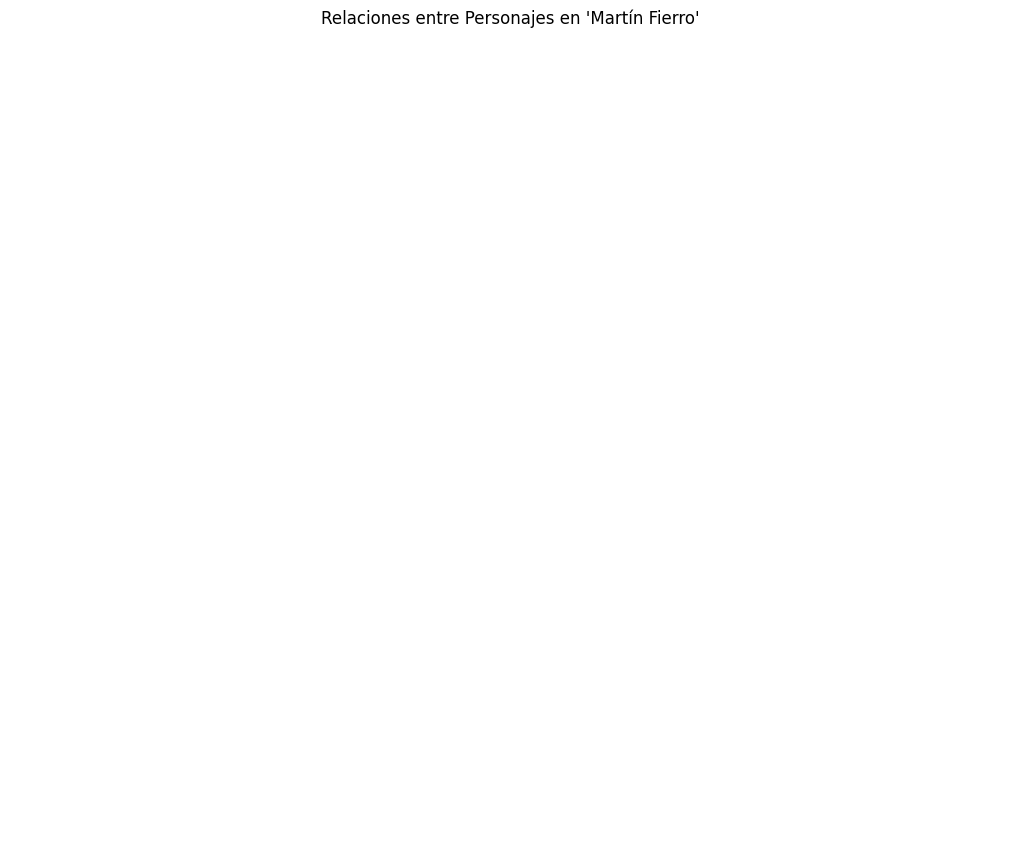

In [ ]:
# Creamos el gráfico de redes
import networkx as nx
import matplotlib.pyplot as plt

# Inicializamos el grafo
G = nx.Graph()

# Añadimos los nodos (personajes)
for personaje, conteo in conteo_personajes.items():
    G.add_node(personaje)

# Añadimos las aristas (relaciones entre personajes)
for estrofa in train_set:
    for personaje in personajes:
        if personaje in estrofa:
            for otro_personaje in personajes:
                if otro_personaje != personaje and otro_personaje in estrofa:
                    G.add_edge(personaje, otro_personaje)

# Dibujamos el gráfico de redes
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=2000, node_color="lightblue", font_size=10, font_weight="bold")
plt.title("Relaciones entre Personajes en 'Martín Fierro'")
plt.show()




#**Presentación**

En el presente trabajo, he abordado el análisis literario del poema "Martín Fierro" de José Hernández, un emblema de la literatura gauchesca argentina. Mi intención es ofrecer una visión enriquecida sobre los personajes principales y sus relaciones, utilizando herramientas tecnológicas que permiten explorar el texto desde una perspectiva innovadora.

El objetivo inicial de este proyecto era desarrollar un notebook en Python que automatizara el análisis de entidades y relaciones presentes en el texto, apoyándome en bibliotecas como spaCy para el procesamiento del lenguaje natural y herramientas de visualización para representar gráficamente las conexiones entre los personajes. Aunque, por limitaciones técnicas, no he logrado obtener resultados automatizados, he complementado este trabajo con una investigación visual y literaria que me permite exponer resultados alineados con los objetivos deseados del proyecto.

#**Metodología**

**Análisis Literario Manual:**

A través de una revisión del poema y de bibliografía de análisis literario, identifiqué los personajes principales y sus roles en la narrativa. Este paso fue esencial para complementar la idea inicial de usar algoritmos de procesamiento del lenguaje.

**Diseño del Notebook:**

Aunque el código no se encuentra completamente operativo, se diseñaron las siguientes etapas:

Descarga y preprocesamiento del texto completo del "Martín Fierro".
Identificación automática de entidades mencionadas (nombres de personajes, lugares, conceptos).
Generación de un gráfico de relaciones entre personajes.

**Resultados Deseados:**

A partir de los datos analizados manualmente, se expone lo siguiente como el ideal esperado del análisis automatizado.


#**Análisis de los Personajes de "Martín Fierro"**

Este análisis describe los personajes principales del poema "Martín Fierro" y sus relaciones. Basado en bibliografía literaria, se presenta una visión resumida de su importancia y conexiones.

#**Personajes Principales**

##**Descripción de los Personajes**

###**Martín Fierro**

El protagonista y voz del poema, un gaucho que expresa su vida, sufrimientos y anhelos a través del canto. Representa la figura del hombre libre y valiente, pero también del perseguido y marginado.

### **Los Santos**

Aunque no son personajes en el sentido tradicional, los santos son invocados por Martín Fierro para que lo ayuden en su canto y en su vida. Representan la búsqueda de apoyo espiritual y la conexión con lo divino.

### **La China**

La esposa de Martín Fierro, que simboliza el hogar y la familia. Su presencia en el poema resalta la vida familiar del gaucho y el dolor de la separación.

### **El Pueblo**

Aunque no se menciona como un personaje individual, el pueblo representa la sociedad que juzga y persigue a Martín Fierro, reflejando la injusticia y el maltrato que sufre.

### **Los Cantores**

Otros cantores mencionados en el poema que contrastan con Martín Fierro, mostrando la competencia y la camaradería entre los gauchos.


## **Relaciones entre los Personajes**

- **Martín Fierro y Los Santos**: La relación es de dependencia, donde Martín Fierro busca la ayuda de los santos para expresar su historia y sus sentimientos. Esto muestra su vulnerabilidad y la necesidad de apoyo en momentos difíciles.
  
- **Martín Fierro y La China**: La relación es de amor y añoranza. La figura de La China representa el hogar y la familia que Martín Fierro ha perdido, lo que añade una capa de tristeza a su canto.

- **Martín Fierro y El Pueblo**: Esta relación es conflictiva. El pueblo representa la sociedad que no comprende a Martín Fierro y lo margina, lo que refleja la lucha del gaucho contra la injusticia social.

- **Martín Fierro y Los Cantores**: Aquí se establece una relación de competencia y camaradería. Martín Fierro se siente parte de una tradición de cantores, pero también busca destacar y ser reconocido por su propio talento.


## **Conclusión**


El Martín Fierro trasciende las páginas del poema y se erige como un símbolo de lucha, libertad y resistencia frente a las adversidades. Este trabajo representa un intento por honrar ese legado, integrando herramientas modernas para desentrañar las complejas relaciones y significados que habitan en sus versos. Aunque el notebook no alcanzó su estado funcional en esta instancia, la investigación realizada refleja el espíritu de aprendizaje constante y la pasión por conectar las humanidades con la tecnología.

En cada estrofa del Martín Fierro, late el corazón de una sociedad que encuentra en el canto del gaucho una voz para sus luchas y esperanzas. Este proyecto no solo aspira a comprender esa voz, sino también a mostrar cómo la inteligencia artificial puede convertirse en un puente entre el pasado literario y el presente tecnológico.

Así como Martín Fierro enfrentó sus desafíos con valentía, este trabajo simboliza el compromiso de seguir explorando nuevas formas de aprendizaje y análisis, superando obstáculos y descubriendo nuevas perspectivas. Porque en el cruce entre la literatura y la tecnología, habita una riqueza que transforma nuestra visión del mundo y amplía nuestras posibilidades de entenderlo.








#**Bibliografia consultada**

Hernández, José. "El Gaucho Martín Fierro". [Enlace al poema](https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-
_el_gaucho_martin_fierro.pdf)

SpaCy Documentation: [https://spacy.io/](https://spacy.io/)

NetworkX Documentation: [https://networkx.org/](https://networkx.org/)

Uso de Inteligencia Artificial

Se utilizó ChatGPT para generar parte del código y la estructura del notebook.

El prompt utilizado fue: "Ayúdame a desarrollar una guia para un desarrollo de inteligencia artificial un notebook para identificar personajes en Martin Fierro
en Colab para identificar personajes y relaciones en 'El Martín Fierro'".

La contribución de la IA fue fundamental para estructurar el contenido con ejemplos en  los casos que correspondiade los modelos que en cada caso se podian utilizar y sus beneficios yriesgos.

Tambien se pidio ayuda para conocer de cada modelo utilizado con lujo de detalles de parametros y otros elementos claves. Tambien en casos de deteccion o precesia de errorres, se consulto la metodologia para rastraar problemas

Recursos bibliográficos y análisis

Análisis literario y contexto histórico del Martín Fierro: El sitio En Pocas Palabras ofrece un análisis detallado del contexto histórico, las problemáticas sociales y el impacto de la obra en la construcción de la identidad argentina.

Este enfoque puede enriquecer la parte contextual del notebook, ayudándome a conectar las temáticas literarias con los métodos analíticos empleados​


Resumen y análisis general del Martín Fierro: La página Filosofando propone una reseña integral sobre los valores culturales y literarios de la obra, destacando elementos de la vida gauchesca y las críticas sociales presentes en el poema.

Videos y tutoriales en YouTube

Análisis de obras literarias con IA: Busqueda de canales educativos que explican el uso de inteligencia artificial para analizar textos, como el análisis de sentimientos, temas y estilos literarios.

Por ejemplo, los canales "Código Mentor" o "Aprendiendo IA" tienen guías sobre cómo aplicar procesamiento de lenguaje natural (NLP).

Herramientas de IA y Python:

Tutoriales en canales como "Python para Todos" o "Data Science con Python" ayudan a implementar librerías como NLTK o spaCy para continuar con la construcción del notebook.

Herramientas para análisis literario con IA

Google Colab y Jupyter Notebook:

para encarar problemas con la ejecución del notebook, he revizado tutoriales para configurar el entorno y asegurarme de tener todas las librerías necesarias instaladas.

Otras librerías recomendadas:

Pandas para manejar datos tabulares, Matplotlib y Seaborn para visualizaciones, y TextBlob o NLTK para análisis de sentimientos y conteo de frecuencias en el texto.